In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

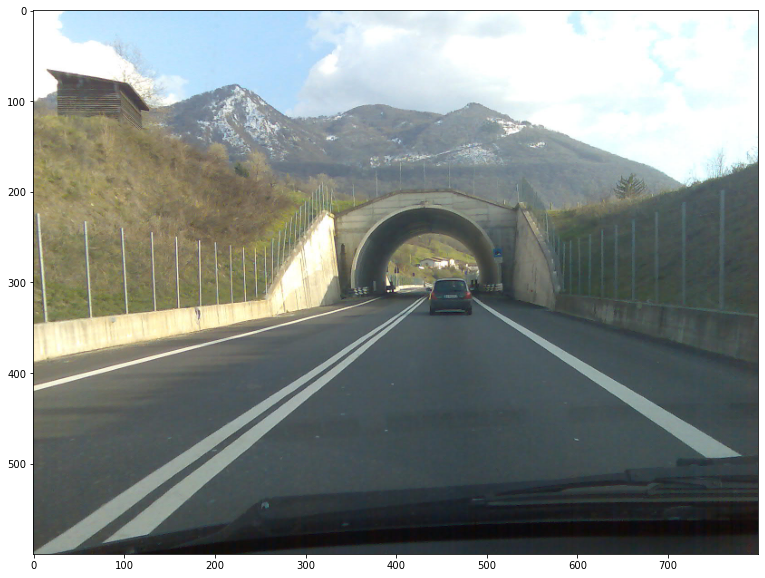

In [2]:
img = cv2.imread('dashcam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)

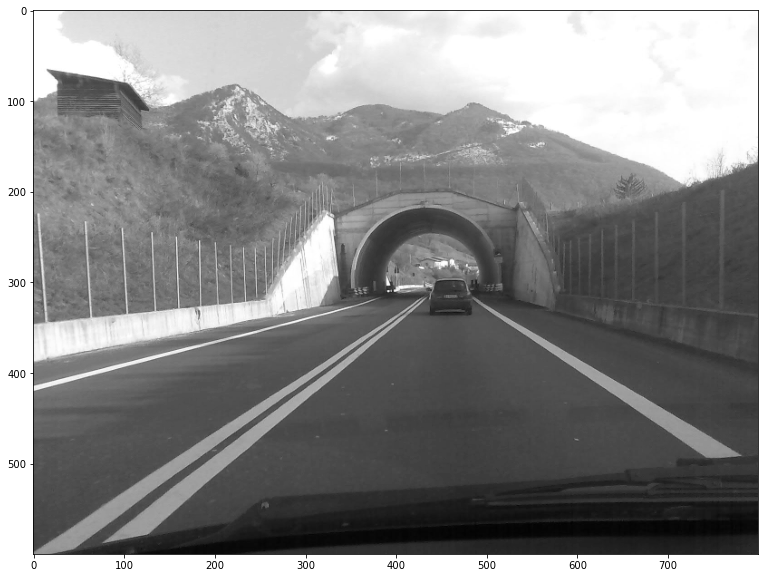

In [3]:
# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

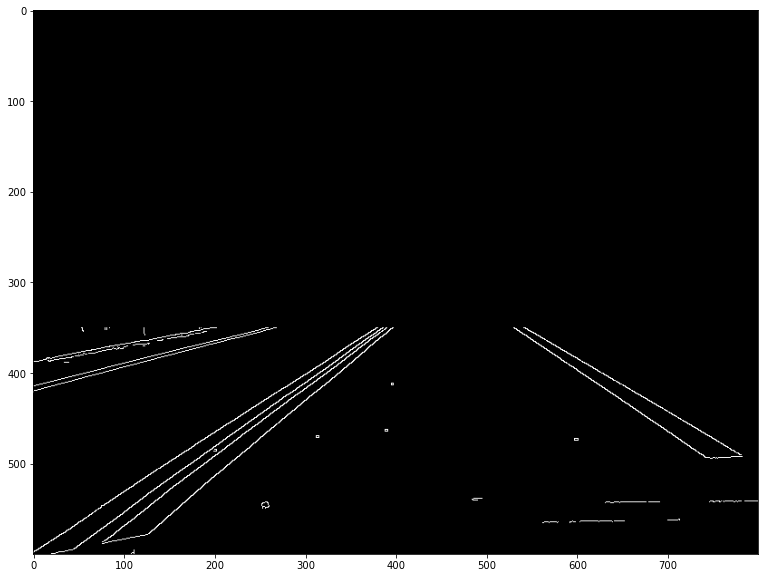

In [4]:
edges = cv2.Canny(gray, threshold1= 100, threshold2 = 150)
edges[0:350] = 0
plt.imshow(edges, cmap='gray')

(<AxesSubplot:title={'center':'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

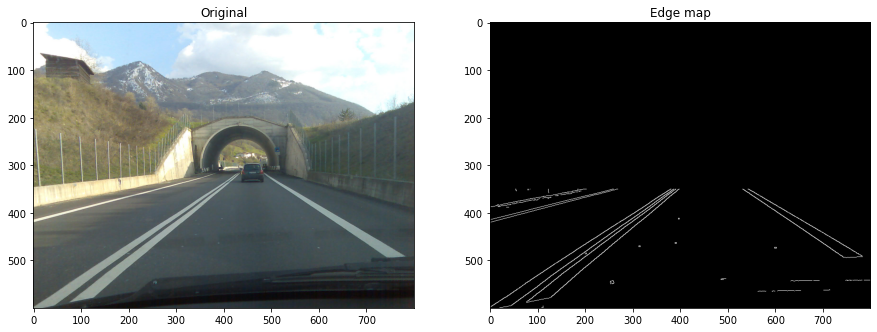

In [5]:
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

In [6]:
# Apply Hough transform to parametrize the lines
lines = cv2.HoughLines(edges, rho=2, theta=2*np.pi/180, threshold=190)


# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]
print(lines)
#lines2=np.delete(lines, 4, axis=0)


[[521.           0.87266463]
 [505.           0.94247776]
 [509.           0.9075712 ]
 [495.           0.9773844 ]
 [401.           1.3264502 ]
 [ -7.           2.1642082 ]
 [513.           0.94247776]
 [499.           1.012291  ]
 [ 31.           2.0943952 ]
 [511.           0.9773844 ]]


(<matplotlib.image.AxesImage at 0x7f74e29a2370>, Text(0.5, 1.0, 'Hough lines'))

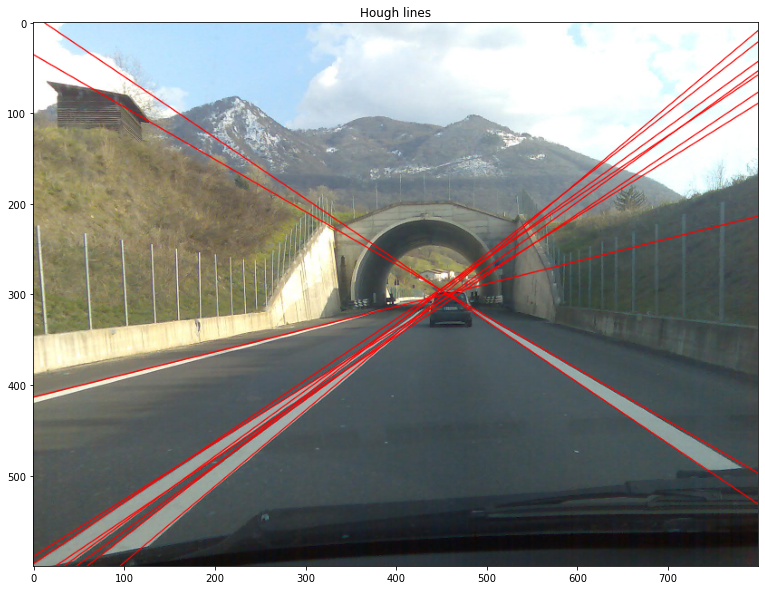

In [7]:
result = np.copy(img)
        
for line in range(0, len(lines)):
    rho = lines[line][0]
    theta = lines[line][1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

#plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
#plt.subplot(122), 
plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [8]:
# Filter out all lines that are approximately horizontal (+/- 20 degrees). 
filtered_lines = []
for line in range(0, len(lines)):
    theta = lines[line][1]
    # Keep line if theta is not horizontal
    if theta>1.2 and theta<1.92:
        filtered_lines.append(line)

x=filtered_lines
filtered_lines=np.delete(lines, x, axis=0)
print(filtered_lines)


[[521.           0.87266463]
 [505.           0.94247776]
 [509.           0.9075712 ]
 [495.           0.9773844 ]
 [ -7.           2.1642082 ]
 [513.           0.94247776]
 [499.           1.012291  ]
 [ 31.           2.0943952 ]
 [511.           0.9773844 ]]


(<AxesSubplot:title={'center':'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

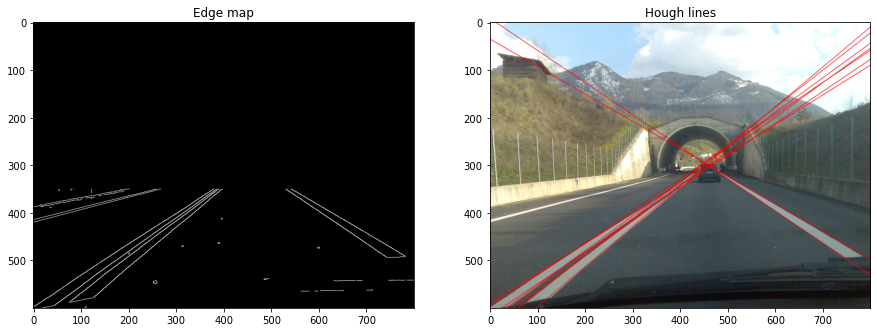

In [9]:
# Let's plot the resulting filtered lines
result = np.copy(img)
 
for line in range(0, len(filtered_lines)):
    rho = filtered_lines[line][0]
    theta = filtered_lines[line][1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [10]:
# We will apply k-means clustering to refine the detected lines.
# Don't worry, we will learn about the clustering later in the course :-)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(filtered_lines)
kmeans.cluster_centers_
type(kmeans.cluster_centers_)
print(kmeans.cluster_centers_)

[[511.           0.94247776]
 [ -7.           2.1642082 ]
 [ 31.           2.0943952 ]
 [497.           0.99483764]
 [521.           0.87266463]
 [505.           0.94247776]]


(<AxesSubplot:title={'center':'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

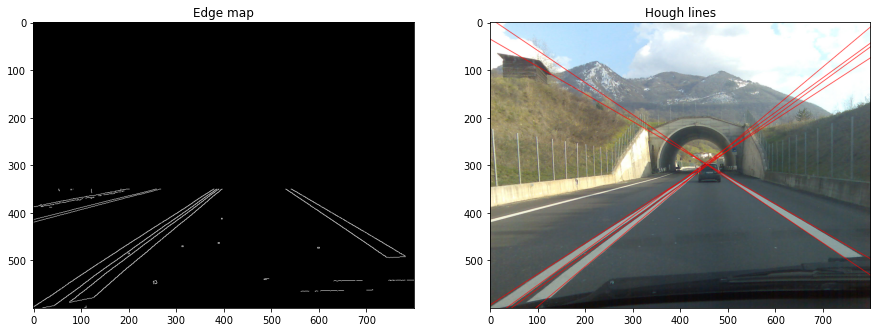

In [11]:
# Again, let's plot the resulting filtered lines
result = np.copy(img)
    
for line in range(0, len(kmeans.cluster_centers_)):
    rho = kmeans.cluster_centers_[line][0]
    theta = kmeans.cluster_centers_[line][1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')